# Basic fibonacci word fractal implementation

## Fibonacci words
A Fibonacci word is a sequence of binary digits. It is formed by repeated concatenation. 

Let $S_0 = ``0"$ and $S_1 = ``01"$  
Then $S_n = S_{n-1}S_{n-2}$  

Eg.: 
$S_0 = ``0"$  
$S_1 = ``01"$  
$S_2 = S_1S_2 = ``010"$  

In [1]:
from functools import lru_cache

s_0 = str(0)
s_1 = str("01")

def S_n(s_0:str, s_1:str, n:int):
    if n == 1:
        return str(s_1)
    if n == 0:
        return str(s_0)

    return S_n(s_0, s_1, n-1) + S_n(s_0, s_1, n-2)

@lru_cache(maxsize=None)
def S_n_cached(n: int, s_0: str = "0", s_1: str = "01"):
    """Cached recursive implementation - O(n) with memoization."""
    if n == 0:
        return s_0
    if n == 1:
        return s_1
    
    return S_n_cached(n-1, s_0, s_1) + S_n_cached(n-2, s_0, s_1)

def S_n_iterative(s_0: str, s_1: str, n: int):
    """Iterative O(n) implementation of Fibonacci word sequence."""
    if n == 0:
        return s_0
    if n == 1:
        return s_1
    
    # Start with the base cases
    prev_prev = s_0  # S_(i-2)
    prev = s_1       # S_(i-1)
    
    # Build up from i=2 to i=n
    for i in range(2, n + 1):
        current = prev + prev_prev  # S_i = S_(i-1) + S_(i-2)
        prev_prev = prev            # Shift: S_(i-2) becomes S_(i-1)
        prev = current              # Shift: S_(i-1) becomes S_i
    
    return prev

# Test all implementations
print("Recursive:", S_n(s_0, s_1, n=5))
print("Cached:   ", S_n_cached(5))
print("Iterative:", S_n_iterative(s_0, s_1, n=5))
print("All match:", S_n(s_0, s_1, n=5) == S_n_cached(5) == S_n_iterative(s_0, s_1, n=5))

Recursive: 0100101001001
Cached:    0100101001001
Iterative: 0100101001001
All match: True


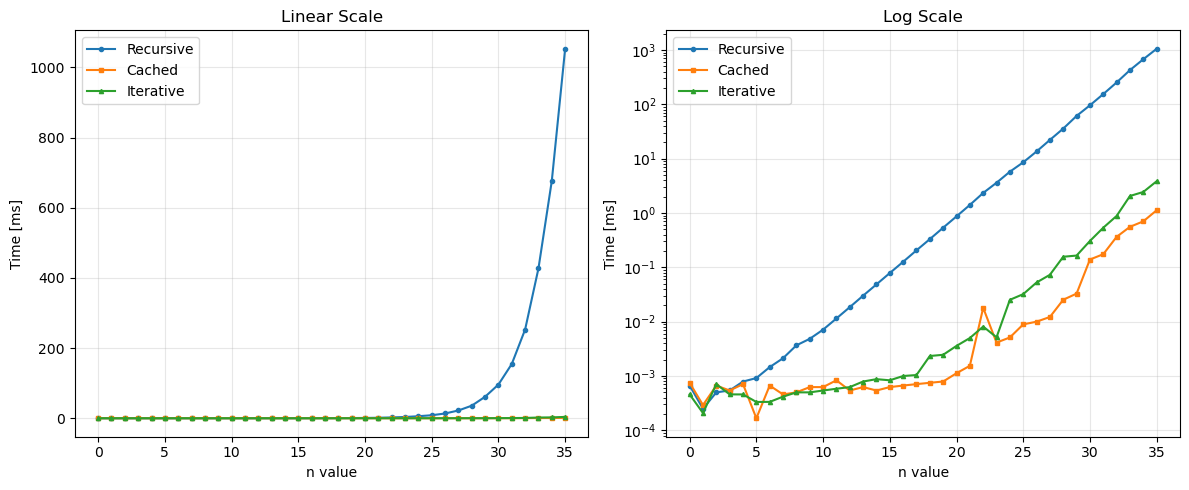

Time for n=35:
  Recursive: 1052.96 ms
  Cached:    1.12 ms
  Iterative: 3.84 ms


In [2]:
from time import perf_counter
import matplotlib.pyplot as plt

# Benchmark all three implementations
n_values = range(0, 36)
times_recursive = []
times_cached = []
times_iterative = []

for n in n_values:
    # Recursive (original)
    start = perf_counter()
    S_n(s_0, s_1, n=n)
    stop = perf_counter()
    times_recursive.append((stop - start) * 1e3)
    
    # Cached
    start = perf_counter()
    S_n_cached(n)
    stop = perf_counter()
    times_cached.append((stop - start) * 1e3)
    
    # Iterative
    start = perf_counter()
    S_n_iterative(s_0, s_1, n=n)
    stop = perf_counter()
    times_iterative.append((stop - start) * 1e3)

# Plot linear scale
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_values, times_recursive, label='Recursive', marker='o', markersize=3)
plt.plot(n_values, times_cached, label='Cached', marker='s', markersize=3)
plt.plot(n_values, times_iterative, label='Iterative', marker='^', markersize=3)
plt.xlabel('n value')
plt.ylabel('Time [ms]')
plt.title('Linear Scale')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot log scale
plt.subplot(1, 2, 2)
plt.plot(n_values, times_recursive, label='Recursive', marker='o', markersize=3)
plt.plot(n_values, times_cached, label='Cached', marker='s', markersize=3)
plt.plot(n_values, times_iterative, label='Iterative', marker='^', markersize=3)
plt.xlabel('n value')
plt.ylabel('Time [ms]')
plt.title('Log Scale')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Time for n=35:")
print(f"  Recursive: {times_recursive[-1]:.2f} ms")
print(f"  Cached:    {times_cached[-1]:.2f} ms")
print(f"  Iterative: {times_iterative[-1]:.2f} ms")

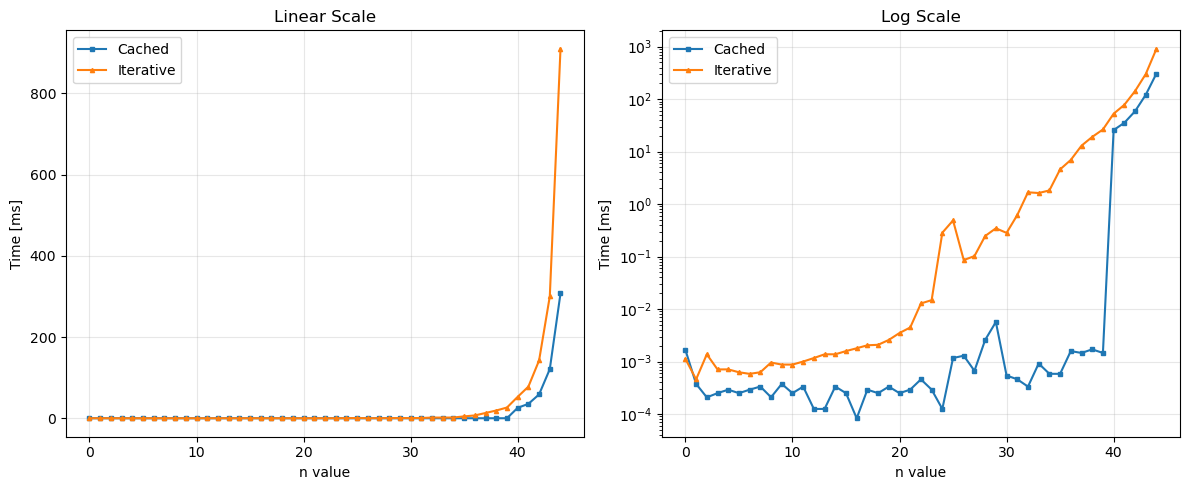

Time for n=44:
  Cached:    307.29 ms
  Iterative: 909.58 ms


In [4]:
# Benchmark all three implementations
n_values = range(0, 45)
times_recursive = []
times_cached = []
times_iterative = []

for n in n_values:
    # Cached
    start = perf_counter()
    S_n_cached(n)
    stop = perf_counter()
    times_cached.append((stop - start) * 1e3)
    
    # Iterative
    start = perf_counter()
    S_n_iterative(s_0, s_1, n=n)
    stop = perf_counter()
    times_iterative.append((stop - start) * 1e3)

# Plot linear scale
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_values, times_cached, label='Cached', marker='s', markersize=3)
plt.plot(n_values, times_iterative, label='Iterative', marker='^', markersize=3)
plt.xlabel('n value')
plt.ylabel('Time [ms]')
plt.title('Linear Scale')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot log scale
plt.subplot(1, 2, 2)
plt.plot(n_values, times_cached, label='Cached', marker='s', markersize=3)
plt.plot(n_values, times_iterative, label='Iterative', marker='^', markersize=3)
plt.xlabel('n value')
plt.ylabel('Time [ms]')
plt.title('Log Scale')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Time for n={max(n_values)}:")
print(f"  Cached:    {times_cached[-1]:.2f} ms")
print(f"  Iterative: {times_iterative[-1]:.2f} ms")